# Exploration of FEMA National Flood Insurance Program (NFIP) data

In [1]:
# Python 3
import sys
assert sys.version_info >= (3, 5)

# Common imports
import os
import numpy as np
import pandas as pd
#pd.set_option('float_format', '{:f}'.format)
#pd.options.display.float_format = "{:.2f}".format

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import colors
%matplotlib inline

# from functools import reduce
# import itertools

import seaborn as sns
sns.set(style="ticks", color_codes=True)

import missingno as msno

print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('matplotlib version:', matplotlib.__version__)
print('seaborn version:', sns.__version__)
print('missingno version:', msno.__version__)
# print('scikit-learn version:', sklearn.__version__)

numpy version: 1.19.4
pandas version: 1.1.4
matplotlib version: 3.3.3
seaborn version: 0.9.0
missingno version: 0.4.2


In [3]:
# Import data
df_raw = pd.read_csv('/homevol/sroe459/Data/FEMA/FIMA_NFIP_Redacted_Claims-v1.csv')

/homevol/sroe459/miniconda3/envs/sandbox_001/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2495983 entries, 0 to 2495982
Data columns (total 40 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   agricultureStructureIndicator               float64
 1   asOfDate                                    object 
 2   baseFloodElevation                          float64
 3   basementEnclosureCrawlspace                 float64
 4   reportedCity                                object 
 5   condominiumIndicator                        object 
 6   policyCount                                 float64
 7   countyCode                                  float64
 8   communityRatingSystemDiscount               float64
 9   dateOfLoss                                  object 
 10  elevatedBuildingIndicator                   float64
 11  elevationCertificateIndicator               float64
 12  elevationDifference                         float64
 13  censusTract                

In [9]:
# Shape
nRow, nCol = df_raw.shape
nRow = '{:,.0f}'.format(nRow)
print(f'There are {nRow} rows and {nCol} columns')

There are 2,495,983 rows and 40 columns


In [11]:
with pd.option_context('display.max_columns', 100):
    display(df_raw.head(10))

,agricultureStructureIndicator,asOfDate,baseFloodElevation,basementEnclosureCrawlspace,reportedCity,condominiumIndicator,policyCount,countyCode,communityRatingSystemDiscount,dateOfLoss,elevatedBuildingIndicator,elevationCertificateIndicator,elevationDifference,censusTract,floodZone,houseWorship,latitude,longitude,locationOfContents,lowestAdjacentGrade,lowestFloorElevation,numberOfFloorsInTheInsuredBuilding,nonProfitIndicator,obstructionType,occupancyType,originalConstructionDate,originalNBDate,amountPaidOnBuildingClaim,amountPaidOnContentsClaim,amountPaidOnIncreasedCostOfComplianceClaim,postFIRMConstructionIndicator,rateMethod,smallBusinessIndicatorBuilding,state,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,yearOfLoss,reportedZipcode,primaryResidence,id
0,0.0,2020-11-01T23:58:45.858Z,NaN,1.0,DETROIT,N,1.0,26163.0,8.0,2014-08-11T04:00:00.000Z,0.0,NaN,NaN,2.616351e+10,B,0.0,42.4,-82.9,2.0,NaN,NaN,3.0,0.0,NaN,1.0,2040-01-01T05:00:00.000Z,2012-07-19T04:00:00.000Z,3507.13,NaN,NaN,0.0,Q,0.0,MI,250000.0,100000.0,2014,48215.0,1.0,5faad46bad3f68081876d038
1,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,TRENTON,N,1.0,34021.0,NaN,1999-09-16T04:00:00.000Z,0.0,NaN,NaN,3.402100e+10,A04,0.0,40.2,-74.8,3.0,NaN,NaN,1.0,0.0,10.0,1.0,1950-07-01T04:00:00.000Z,1984-10-06T04:00:00.000Z,6389.31,NaN,NaN,0.0,1,0.0,NJ,166800.0,5900.0,1999,8638.0,1.0,5faad46bad3f68081876d046
2,0.0,2020-11-01T23:58:45.858Z,NaN,1.0,DETROIT,N,1.0,26163.0,8.0,2016-07-07T04:00:00.000Z,0.0,NaN,NaN,2.616351e+10,B,0.0,42.4,-82.9,2.0,NaN,NaN,3.0,0.0,NaN,1.0,2027-01-01T05:00:00.000Z,2013-01-16T05:00:00.000Z,1638.01,NaN,NaN,0.0,R,0.0,MI,75000.0,30000.0,2016,48215.0,0.0,5faad46bad3f68081876d03f
3,0.0,2020-11-01T23:58:45.858Z,NaN,2.0,DETROIT,N,1.0,26163.0,8.0,2014-08-11T04:00:00.000Z,0.0,NaN,NaN,2.616351e+10,B,0.0,42.4,-82.9,2.0,NaN,NaN,3.0,0.0,NaN,1.0,2022-01-01T05:00:00.000Z,2012-04-24T04:00:00.000Z,3651.57,NaN,NaN,0.0,Q,0.0,MI,250000.0,100000.0,2014,48215.0,1.0,5faad46bad3f68081876d043
4,0.0,2020-11-01T23:58:45.858Z,NaN,2.0,DETROIT,N,1.0,26163.0,8.0,2016-07-08T04:00:00.000Z,0.0,NaN,NaN,2.616351e+10,B,0.0,42.4,-82.9,2.0,NaN,NaN,2.0,0.0,NaN,1.0,2047-01-01T05:00:00.000Z,2012-04-26T04:00:00.000Z,3836.59,NaN,NaN,0.0,R,0.0,MI,150000.0,60000.0,2016,48215.0,1.0,5faad46bad3f68081876d036
5,0.0,2020-11-01T23:58:45.858Z,NaN,2.0,SCRANTON,N,1.0,42069.0,NaN,1985-09-27T04:00:00.000Z,0.0,NaN,NaN,4.206910e+10,A10,0.0,41.4,-75.7,4.0,NaN,NaN,2.0,0.0,10.0,1.0,1950-07-01T04:00:00.000Z,1984-10-05T04:00:00.000Z,3688.00,NaN,NaN,0.0,1,0.0,PA,35000.0,0.0,1985,18508.0,0.0,5faad46bad3f68081876d05b
6,0.0,2020-11-01T23:58:45.858Z,NaN,1.0,DETROIT,N,1.0,26163.0,8.0,2014-08-11T04:00:00.000Z,0.0,NaN,NaN,2.616351e+10,X,0.0,42.4,-82.9,2.0,NaN,NaN,3.0,0.0,NaN,1.0,1997-10-10T04:00:00.000Z,2013-11-08T05:00:00.000Z,8855.33,NaN,NaN,1.0,7,0.0,MI,20000.0,8000.0,2014,48215.0,1.0,5faad46bad3f68081876d05a
7,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,DES ARC,N,1.0,5117.0,NaN,2011-05-02T04:00:00.000Z,1.0,NaN,NaN,5.117460e+09,A,0.0,35.0,-91.5,NaN,NaN,NaN,1.0,0.0,10.0,1.0,1957-09-05T04:00:00.000Z,2007-11-06T05:00:00.000Z,34500.00,NaN,NaN,0.0,1,0.0,AR,34500.0,0.0,2011,72040.0,1.0,5faad46bad3f68081876d03a
8,0.0,2020-11-01T23:58:45.858Z,NaN,2.0,DETROIT,N,1.0,26163.0,8.0,2019-05-01T04:00:00.000Z,0.0,NaN,NaN,2.616351e+10,X,0.0,42.4,-82.9,2.0,NaN,NaN,3.0,0.0,NaN,1.0,2045-01-01T05:00:00.000Z,2013-08-26T04:00:00.000Z,5071.85,1024.87,NaN,0.0,7,0.0,MI,150000.0,60000.0,2019,48215.0,1.0,5faad46bad3f68081876d047
9,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,LA PORTE,N,1.0,48201.0,7.0,2007-08-17T04:00:00.000Z,0.0,NaN,NaN,4.820134e+10,X,0.0,29.7,-95.1,3.0,NaN,NaN,1.0,0.0,NaN,1.0,1958-01-01T05:00:00.000Z,2007-06-24T04:00:00.000Z,17934.47,6574.71,NaN,0.0,7,0.0,TX,100000.0,40000.0,2007,77571.0,1.0,5faad46bad3f68081876d063


In [12]:
with pd.option_context('display.max_columns', 100):
    display(df_raw.tail(10))

,agricultureStructureIndicator,asOfDate,baseFloodElevation,basementEnclosureCrawlspace,reportedCity,condominiumIndicator,policyCount,countyCode,communityRatingSystemDiscount,dateOfLoss,elevatedBuildingIndicator,elevationCertificateIndicator,elevationDifference,censusTract,floodZone,houseWorship,latitude,longitude,locationOfContents,lowestAdjacentGrade,lowestFloorElevation,numberOfFloorsInTheInsuredBuilding,nonProfitIndicator,obstructionType,occupancyType,originalConstructionDate,originalNBDate,amountPaidOnBuildingClaim,amountPaidOnContentsClaim,amountPaidOnIncreasedCostOfComplianceClaim,postFIRMConstructionIndicator,rateMethod,smallBusinessIndicatorBuilding,state,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,yearOfLoss,reportedZipcode,primaryResidence,id
2495973,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,VEGA BAJA,N,1.0,72145.0,NaN,2012-11-12T05:00:00.000Z,0.0,1.0,NaN,7.214556e+10,A07,0.0,18.4,-66.4,NaN,NaN,NaN,1.0,0.0,NaN,1.0,1970-01-01T05:00:00.000Z,2002-01-25T05:00:00.000Z,7536.31,NaN,NaN,0.0,1,0.0,PR,62400.0,0.0,2012,693.0,1.0,5faad640ad3f6808189ce5fd
2495974,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,CANOVANAS,N,1.0,72029.0,NaN,2004-09-15T04:00:00.000Z,0.0,1.0,NaN,7.202910e+10,AE,0.0,18.4,-65.9,NaN,NaN,NaN,1.0,0.0,NaN,1.0,1970-01-01T05:00:00.000Z,2002-01-16T05:00:00.000Z,6981.20,NaN,NaN,0.0,1,0.0,PR,78000.0,0.0,2004,729.0,1.0,5faad640ad3f6808189ce5fe
2495975,0.0,2020-11-01T23:58:45.858Z,NaN,2.0,CAMBRIDGE,N,1.0,24019.0,6.0,2003-09-18T04:00:00.000Z,1.0,NaN,NaN,2.401997e+10,AE,0.0,38.6,-76.3,NaN,NaN,NaN,2.0,0.0,50.0,1.0,1958-07-01T04:00:00.000Z,2001-12-14T05:00:00.000Z,6018.95,NaN,NaN,0.0,1,0.0,MD,78000.0,0.0,2003,21613.0,0.0,5faad640ad3f6808189ce603
2495976,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,MIAMI,N,1.0,12086.0,5.0,1999-10-15T04:00:00.000Z,0.0,2.0,NaN,1.208602e+10,AH,0.0,25.7,-80.4,NaN,NaN,NaN,1.0,0.0,10.0,1.0,1992-10-12T04:00:00.000Z,1999-09-08T04:00:00.000Z,5999.49,NaN,NaN,0.0,9,0.0,FL,65400.0,0.0,1999,33183.0,0.0,5faad640ad3f6808189ce60c
2495977,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,RODANTHE,N,1.0,37055.0,7.0,1999-10-16T04:00:00.000Z,0.0,NaN,NaN,3.705597e+10,AE,0.0,35.6,-75.5,NaN,NaN,NaN,1.0,0.0,10.0,1.0,1976-01-01T05:00:00.000Z,1999-10-13T04:00:00.000Z,1811.19,NaN,NaN,0.0,1,0.0,NC,5000.0,0.0,1999,27968.0,1.0,5faad640ad3f6808189ce60e
2495978,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,PHILADELPHIA,N,1.0,42017.0,NaN,1999-09-16T04:00:00.000Z,0.0,2.0,NaN,4.201710e+10,AE,0.0,40.2,-75.1,NaN,NaN,NaN,1.0,0.0,10.0,1.0,1992-10-12T04:00:00.000Z,1999-03-05T05:00:00.000Z,5544.25,NaN,NaN,0.0,9,0.0,PA,30800.0,0.0,1999,18976.0,0.0,5faad640ad3f6808189ce613
2495979,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,LAUDERHILL,N,1.0,12011.0,7.0,1999-05-25T04:00:00.000Z,0.0,2.0,NaN,1.201106e+10,AH,0.0,26.2,-80.2,NaN,NaN,NaN,1.0,0.0,10.0,1.0,1992-10-12T04:00:00.000Z,1999-02-24T05:00:00.000Z,NaN,NaN,NaN,0.0,9,0.0,FL,86100.0,0.0,1999,33313.0,0.0,5faad640ad3f6808189ce618
2495980,0.0,2020-11-01T23:58:45.858Z,NaN,0.0,ORTING,N,1.0,53053.0,2.0,2006-11-06T05:00:00.000Z,0.0,NaN,NaN,5.305307e+10,C,0.0,47.1,-122.1,3.0,NaN,NaN,1.0,0.0,NaN,1.0,1980-07-01T04:00:00.000Z,2001-12-07T05:00:00.000Z,11538.31,1977.23,NaN,0.0,7,0.0,WA,150000.0,60000.0,2006,98360.0,0.0,5faad640ad3f6808189ce629
2495981,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,LAFAYETTE,N,1.0,22055.0,8.0,1993-01-21T05:00:00.000Z,0.0,NaN,NaN,2.205500e+10,B,0.0,30.2,-92.0,3.0,NaN,NaN,1.0,0.0,10.0,1.0,1982-03-30T05:00:00.000Z,1992-09-16T04:00:00.000Z,4972.00,NaN,NaN,1.0,1,0.0,LA,185000.0,60000.0,1993,70503.0,0.0,5faad640ad3f6808189ce634
2495982,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,HOMOSASSA,N,1.0,12017.0,NaN,1993-03-13T05:00:00.000Z,0.0,NaN,NaN,1.201745e+10,A,0.0,28.8,-82.6,4.0,NaN,NaN,2.0,0.0,10.0,1.0,1974-07-01T04:00:00.000Z,1991-07-03T04:00:00.000Z,7699.52,NaN,NaN,0.0,1,0.0,FL,60000.0,0.0,1993,34448.0,0.0,5faad640ad3f6808189ce63b


## Location

In [13]:
# Check missing values in latitude
df_raw['latitude'].isnull().value_counts()

False    2453803
True       42180
Name: latitude, dtype: int64

In [14]:
# Check missing values in latitude
df_raw['longitude'].isnull().value_counts()

False    2453803
True       42180
Name: longitude, dtype: int64

In [19]:
# Remove instances with missing latitude
df = df_raw.dropna(axis=0, subset=['latitude'])

In [21]:
# Shape
nRow, nCol = df.shape
nRow = '{:,.0f}'.format(nRow)
print(f'There are {nRow} rows and {nCol} columns')

There are 2,453,803 rows and 40 columns


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2453803 entries, 0 to 2495982
Data columns (total 40 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   agricultureStructureIndicator               float64
 1   asOfDate                                    object 
 2   baseFloodElevation                          float64
 3   basementEnclosureCrawlspace                 float64
 4   reportedCity                                object 
 5   condominiumIndicator                        object 
 6   policyCount                                 float64
 7   countyCode                                  float64
 8   communityRatingSystemDiscount               float64
 9   dateOfLoss                                  object 
 10  elevatedBuildingIndicator                   float64
 11  elevationCertificateIndicator               float64
 12  elevationDifference                         float64
 13  censusTract                

# Event date

In [44]:
# Year of loss
df['dateOfLoss'].value_counts()

2005-08-29T04:00:00.000Z    184472
2012-10-29T04:00:00.000Z    126705
2008-09-13T04:00:00.000Z     43526
2011-08-28T04:00:00.000Z     32345
1995-05-08T04:00:00.000Z     31484
                             ...  
1977-05-14T04:00:00.000Z         1
1984-11-17T05:00:00.000Z         1
1977-01-03T05:00:00.000Z         1
1990-09-27T04:00:00.000Z         1
1977-01-01T05:00:00.000Z         1
Name: dateOfLoss, Length: 15871, dtype: int64

# Select instances for August 29, 2005 event (Hurricane Katrina)

In [45]:
df_Katrina = df[df['dateOfLoss'] == '2005-08-29T04:00:00.000Z']

In [46]:
# Shape
nRow, nCol = df_Katrina.shape
nRow = '{:,.0f}'.format(nRow)
print(f'There are {nRow} rows and {nCol} columns')

There are 184,472 rows and 40 columns


In [47]:
df_Katrina.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184472 entries, 1237 to 2495971
Data columns (total 40 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   agricultureStructureIndicator               184472 non-null  float64
 1   asOfDate                                    184472 non-null  object 
 2   baseFloodElevation                          75692 non-null   float64
 3   basementEnclosureCrawlspace                 14281 non-null   float64
 4   reportedCity                                184466 non-null  object 
 5   condominiumIndicator                        184454 non-null  object 
 6   policyCount                                 184472 non-null  float64
 7   countyCode                                  184330 non-null  float64
 8   communityRatingSystemDiscount               160199 non-null  float64
 9   dateOfLoss                                  184472 non-null  objec

<AxesSubplot:>

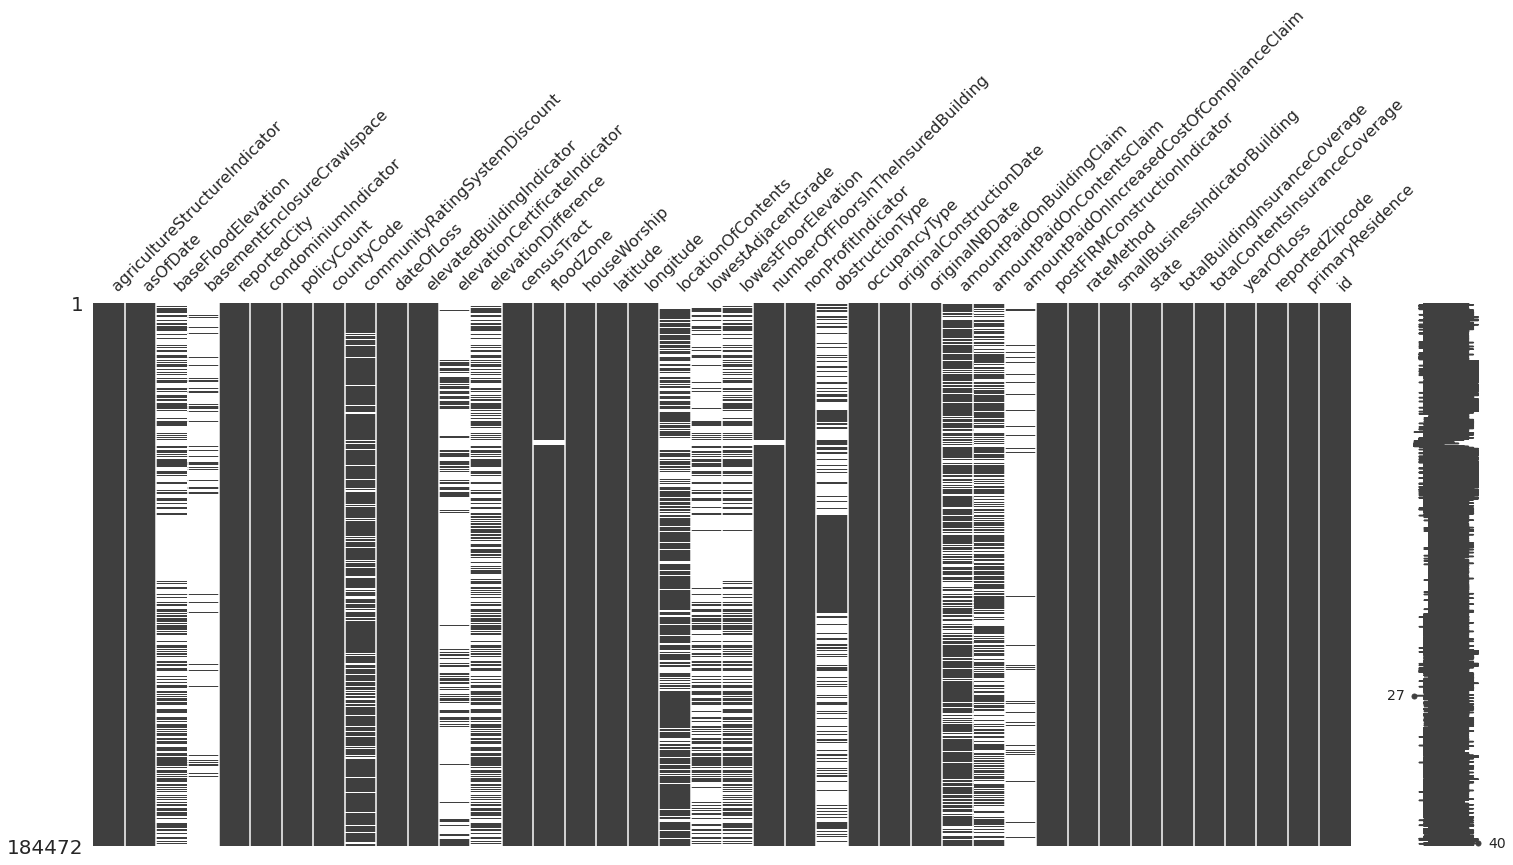

In [48]:
# Check missing values 
msno.matrix(df_Katrina)

In [49]:
with pd.option_context('display.max_columns', 100):
    display(df_Katrina.head(10))

,agricultureStructureIndicator,asOfDate,baseFloodElevation,basementEnclosureCrawlspace,reportedCity,condominiumIndicator,policyCount,countyCode,communityRatingSystemDiscount,dateOfLoss,elevatedBuildingIndicator,elevationCertificateIndicator,elevationDifference,censusTract,floodZone,houseWorship,latitude,longitude,locationOfContents,lowestAdjacentGrade,lowestFloorElevation,numberOfFloorsInTheInsuredBuilding,nonProfitIndicator,obstructionType,occupancyType,originalConstructionDate,originalNBDate,amountPaidOnBuildingClaim,amountPaidOnContentsClaim,amountPaidOnIncreasedCostOfComplianceClaim,postFIRMConstructionIndicator,rateMethod,smallBusinessIndicatorBuilding,state,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,yearOfLoss,reportedZipcode,primaryResidence,id
1237,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,HARAHAN,N,1.0,22051.0,8.0,2005-08-29T04:00:00.000Z,0.0,NaN,NaN,2.205102e+10,X,0.0,30.0,-90.2,3.0,NaN,NaN,1.0,0.0,NaN,4.0,1975-06-01T04:00:00.000Z,1997-08-29T04:00:00.000Z,NaN,NaN,NaN,1.0,1,0.0,LA,200000.0,100000.0,2005,70123.0,0.0,5faad46bad3f68081876d50f
1247,0.0,2020-11-01T23:58:45.858Z,3.0,NaN,KENNER,N,1.0,22051.0,6.0,2005-08-29T04:00:00.000Z,0.0,NaN,0.0,2.205102e+10,AE,0.0,30.0,-90.3,3.0,0.0,3.0,1.0,0.0,NaN,4.0,1997-01-25T05:00:00.000Z,1997-07-25T04:00:00.000Z,96629.92,75000.00,NaN,1.0,1,0.0,LA,163400.0,220500.0,2005,70062.0,0.0,5faad46bad3f68081876d507
1414,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,SLIDELL,N,1.0,22103.0,7.0,2005-08-29T04:00:00.000Z,0.0,NaN,NaN,2.210304e+10,C,0.0,30.3,-89.8,3.0,NaN,NaN,1.0,0.0,NaN,1.0,1974-12-30T05:00:00.000Z,1997-07-25T04:00:00.000Z,117000.00,38600.00,NaN,0.0,1,0.0,LA,117000.0,38600.0,2005,70458.0,0.0,5faad46bad3f68081876d5cd
2270,0.0,2020-11-01T23:58:45.858Z,NaN,0.0,NEW ORLEANS,N,1.0,22071.0,8.0,2005-08-29T04:00:00.000Z,0.0,NaN,NaN,2.207101e+10,X,0.0,30.0,-90.1,5.0,NaN,NaN,2.0,0.0,NaN,2.0,2040-01-01T05:00:00.000Z,1997-09-01T04:00:00.000Z,105036.03,10927.64,NaN,0.0,7,0.0,LA,250000.0,100000.0,2005,70118.0,1.0,5faad46cad3f68081876d917
2295,0.0,2020-11-01T23:58:45.858Z,NaN,0.0,NEW ORLEANS,N,1.0,22071.0,8.0,2005-08-29T04:00:00.000Z,0.0,NaN,NaN,2.207100e+10,X,0.0,30.0,-90.1,3.0,NaN,NaN,1.0,0.0,NaN,2.0,1950-01-01T05:00:00.000Z,1997-09-01T04:00:00.000Z,11432.97,NaN,NaN,0.0,7,0.0,LA,100000.0,40000.0,2005,70122.0,0.0,5faad46cad3f68081876d935
4471,0.0,2020-11-01T23:58:45.858Z,4.0,NaN,NEW ORLEANS,N,1.0,22071.0,8.0,2005-08-29T04:00:00.000Z,0.0,3.0,0.0,2.207100e+10,A04,0.0,30.0,-90.0,3.0,3.5,3.0,1.0,0.0,NaN,6.0,1984-06-01T04:00:00.000Z,2003-04-25T04:00:00.000Z,440000.00,NaN,NaN,1.0,1,0.0,LA,440000.0,0.0,2005,70127.0,0.0,5faad46cad3f68081876e1c1
5593,0.0,2020-11-01T23:58:45.858Z,1.0,NaN,NEW ORLEANS,N,1.0,22071.0,8.0,2005-08-29T04:00:00.000Z,0.0,NaN,0.0,2.207100e+10,AOB,0.0,30.1,-90.0,3.0,0.0,1.0,1.0,0.0,NaN,1.0,1976-01-01T05:00:00.000Z,2001-05-02T04:00:00.000Z,NaN,0.00,NaN,1.0,1,0.0,LA,140000.0,10000.0,2005,70128.0,1.0,5faad46cad3f68081876e634
18819,0.0,2020-11-01T23:58:45.858Z,8.0,NaN,GULF SHORES,N,1.0,1003.0,8.0,2005-08-29T04:00:00.000Z,1.0,3.0,6.0,1.003011e+09,A08,0.0,30.2,-87.8,3.0,0.0,13.0,1.0,0.0,10.0,1.0,1978-07-01T04:00:00.000Z,1995-07-21T04:00:00.000Z,5031.07,301.22,NaN,1.0,1,0.0,AL,115000.0,22100.0,2005,36542.0,0.0,5faad46ead3f6808187719af
21393,0.0,2020-11-01T23:58:45.858Z,3.0,NaN,KENNER,N,1.0,22051.0,6.0,2005-08-29T04:00:00.000Z,0.0,3.0,0.0,2.205102e+10,AE,0.0,30.0,-90.2,NaN,0.0,3.0,1.0,0.0,10.0,4.0,1985-07-01T04:00:00.000Z,1996-09-24T04:00:00.000Z,7740.94,NaN,NaN,1.0,1,0.0,LA,500000.0,0.0,2005,70065.0,0.0,5faad46ead3f6808187723f2
21410,0.0,2020-11-01T23:58:45.858Z,3.0,NaN,KENNER,N,1.0,22051.0,6.0,2005-08-29T04:00:00.000Z,0.0,3.0,0.0,2.205102e+10,A02,0.0,30.0,-90.2,NaN,0.0,3.0,1.0,0.0,10.0,4.0,1985-07-01T04:00:00.000Z,1996-09-24T04:00:00.000Z,19993.31,NaN,NaN,1.0,1,0.0,LA,500000.0,0.0,2005,70065.0,0.0,5faad46ead3f6808187723fc


In [33]:
with pd.option_context('display.max_columns', 100):
    display(df_2005.tail(10))

,agricultureStructureIndicator,asOfDate,baseFloodElevation,basementEnclosureCrawlspace,reportedCity,condominiumIndicator,policyCount,countyCode,communityRatingSystemDiscount,dateOfLoss,elevatedBuildingIndicator,elevationCertificateIndicator,elevationDifference,censusTract,floodZone,houseWorship,latitude,longitude,locationOfContents,lowestAdjacentGrade,lowestFloorElevation,numberOfFloorsInTheInsuredBuilding,nonProfitIndicator,obstructionType,occupancyType,originalConstructionDate,originalNBDate,amountPaidOnBuildingClaim,amountPaidOnContentsClaim,amountPaidOnIncreasedCostOfComplianceClaim,postFIRMConstructionIndicator,rateMethod,smallBusinessIndicatorBuilding,state,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,yearOfLoss,reportedZipcode,primaryResidence,id
2495849,0.0,2020-11-01T23:58:45.858Z,9.0,NaN,NEW IBERIA,N,1.0,22045.0,NaN,2005-09-24T04:00:00.000Z,1.0,3.0,3.0,2.204503e+10,A,0.0,30.0,-91.9,4.0,8.6,12.0,2.0,0.0,10.0,1.0,1950-07-01T04:00:00.000Z,2002-05-16T04:00:00.000Z,NaN,NaN,NaN,0.0,1,0.0,LA,50000.0,0.0,2005,70560.0,1.0,5faad640ad3f6808189ce5a5
2495865,0.0,2020-11-01T23:58:45.858Z,9.0,NaN,MIAMI,N,1.0,12086.0,5.0,2005-08-25T04:00:00.000Z,0.0,NaN,1.0,1.208601e+10,AHB,0.0,25.6,-80.4,3.0,8.3,9.0,1.0,0.0,NaN,1.0,1990-01-01T05:00:00.000Z,2004-02-04T05:00:00.000Z,3541.59,1469.29,NaN,1.0,1,0.0,FL,153300.0,76700.0,2005,33186.0,1.0,5faad640ad3f6808189ce583
2495866,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,PINECREST,N,1.0,12086.0,5.0,2005-08-25T04:00:00.000Z,0.0,NaN,NaN,1.208601e+10,AE,0.0,25.7,-80.3,3.0,NaN,NaN,1.0,0.0,NaN,1.0,1959-01-01T05:00:00.000Z,2004-07-16T04:00:00.000Z,2396.44,NaN,NaN,0.0,1,0.0,FL,245000.0,100000.0,2005,33156.0,1.0,5faad640ad3f6808189ce58f
2495876,0.0,2020-11-01T23:58:45.858Z,6.0,NaN,DAVIE,N,1.0,12011.0,7.0,2005-10-24T04:00:00.000Z,0.0,NaN,4.0,1.201107e+10,AHB,0.0,26.1,-80.3,3.0,7.5,9.0,1.0,0.0,NaN,1.0,2001-05-01T04:00:00.000Z,2001-05-11T04:00:00.000Z,3189.65,NaN,NaN,1.0,1,0.0,FL,250000.0,100000.0,2005,33328.0,1.0,5faad640ad3f6808189ce5b2
2495896,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,CAROLINA,N,1.0,72031.0,NaN,2005-08-25T04:00:00.000Z,0.0,NaN,NaN,7.203105e+10,A07,0.0,18.4,-66.0,NaN,NaN,NaN,1.0,0.0,NaN,1.0,1970-01-01T05:00:00.000Z,2002-01-25T05:00:00.000Z,NaN,NaN,NaN,0.0,1,0.0,PR,92700.0,0.0,2005,985.0,1.0,5faad640ad3f6808189ce600
2495917,0.0,2020-11-01T23:58:45.858Z,6.0,NaN,MIRAMAR,N,1.0,12011.0,8.0,2005-08-12T04:00:00.000Z,0.0,NaN,3.0,1.201111e+10,AHB,0.0,26.0,-80.4,3.0,8.2,9.0,1.0,0.0,NaN,1.0,2001-10-10T04:00:00.000Z,2003-11-16T05:00:00.000Z,NaN,NaN,NaN,1.0,1,0.0,FL,226300.0,92600.0,2005,33029.0,1.0,5faad640ad3f6808189ce61a
2495921,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,NICEVILLE,N,1.0,12131.0,6.0,2005-08-26T04:00:00.000Z,0.0,NaN,NaN,1.213195e+10,X,0.0,30.5,-86.4,4.0,NaN,NaN,3.0,0.0,NaN,1.0,1970-01-01T05:00:00.000Z,2003-12-09T05:00:00.000Z,NaN,NaN,NaN,0.0,7,0.0,FL,250000.0,100000.0,2005,32578.0,0.0,5faad640ad3f6808189ce623
2495942,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,MOUNT BETHEL,N,1.0,42095.0,NaN,2005-04-03T05:00:00.000Z,0.0,NaN,NaN,4.209502e+10,A20,0.0,40.9,-75.1,3.0,NaN,NaN,1.0,0.0,NaN,1.0,2040-07-01T04:00:00.000Z,2003-12-03T05:00:00.000Z,51253.77,11600.00,NaN,0.0,1,0.0,PA,66600.0,20000.0,2005,18343.0,1.0,5faad640ad3f6808189ce64e
2495961,0.0,2020-11-01T23:58:45.858Z,NaN,1.0,MOUNT BETHEL,N,1.0,42095.0,NaN,2005-04-03T05:00:00.000Z,0.0,NaN,NaN,4.209502e+10,AE,0.0,40.9,-75.1,2.0,NaN,NaN,2.0,0.0,NaN,1.0,2047-07-01T04:00:00.000Z,2003-12-08T05:00:00.000Z,32046.58,1870.00,NaN,0.0,1,0.0,PA,250000.0,38600.0,2005,18343.0,0.0,5faad640ad3f6808189ce652
2495971,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,SLIDELL,N,1.0,22103.0,9.0,2005-08-29T04:00:00.000Z,1.0,NaN,NaN,2.210304e+10,AE,0.0,30.3,-89.8,NaN,NaN,NaN,1.0,0.0,15.0,1.0,1974-01-01T05:00:00.000Z,2002-01-30T05:00:00.000Z,15381.76,NaN,NaN,0.0,1,0.0,LA,40000.0,0.0,2005,70460.0,1.0,5faad640ad3f6808189ce638


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

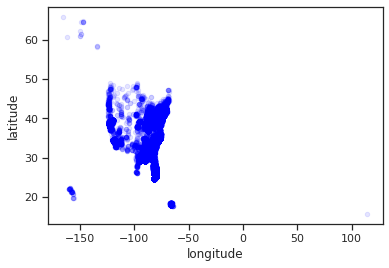

In [34]:
# Plot the instances
df_2005.plot(kind="scatter", x="longitude", y="latitude", color='blue', alpha=0.1)

Outliers?

In [35]:
df_2005['longitude'].describe()

count    277216.000000
mean        -88.476904
std           5.990759
min        -165.600000
25%         -90.100000
50%         -90.000000
75%         -89.100000
max         114.400000
Name: longitude, dtype: float64

In [38]:
#Explore single instance with Long = 114.4
df_2005[df_2005['longitude'] == 114.4]

,agricultureStructureIndicator,asOfDate,baseFloodElevation,basementEnclosureCrawlspace,reportedCity,condominiumIndicator,policyCount,countyCode,communityRatingSystemDiscount,dateOfLoss,...,postFIRMConstructionIndicator,rateMethod,smallBusinessIndicatorBuilding,state,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,yearOfLoss,reportedZipcode,primaryResidence,id
885249,0.0,2020-11-01T23:58:45.858Z,1.0,0.0,NEW ORLEANS,N,1.0,NaN,8.0,2005-08-29T04:00:00.000Z,...,0.0,1,0.0,LA,25000.0,0.0,2005,70116.0,0.0,5faad4f0ad3f6808188452ea


In [39]:
#Drop single instance with Long = 114.4
df_2005 = df_2005[df_2005['longitude'] != 114.4]

In [40]:
df_2005['longitude'].describe()

count    277215.000000
mean        -88.477635
std           5.978365
min        -165.600000
25%         -90.100000
50%         -90.000000
75%         -89.100000
max         -64.700000
Name: longitude, dtype: float64

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

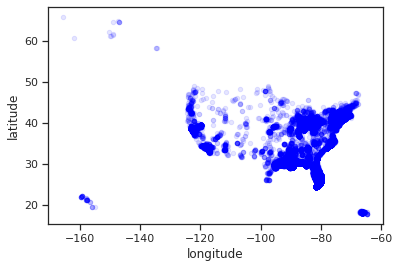

In [41]:
# Plot the instances
df_2005.plot(kind="scatter", x="longitude", y="latitude", color='blue', alpha=0.1)

In [42]:
df_2005['latitude'].describe()

count    277215.000000
mean         30.414383
std           3.236716
min          17.700000
25%          29.900000
50%          30.000000
75%          30.200000
max          65.900000
Name: latitude, dtype: float64

In [43]:
df_2005.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277215 entries, 116 to 2495971
Data columns (total 40 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   agricultureStructureIndicator               277215 non-null  float64
 1   asOfDate                                    277215 non-null  object 
 2   baseFloodElevation                          107164 non-null  float64
 3   basementEnclosureCrawlspace                 33448 non-null   float64
 4   reportedCity                                277207 non-null  object 
 5   condominiumIndicator                        277181 non-null  object 
 6   policyCount                                 277215 non-null  float64
 7   countyCode                                  276963 non-null  float64
 8   communityRatingSystemDiscount               228291 non-null  float64
 9   dateOfLoss                                  277215 non-null  object